<a href="https://colab.research.google.com/github/daniboy0/Data_Science/blob/main/nba_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
nba_players = pd.read_csv("all_seasons.csv")
nba_players.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
#total de jogadores e times
total_jogadores = nba_players.player_name.count()
total_times = nba_players.team_abbreviation.nunique()
print(total_jogadores, total_times)



11145 36


In [ ]:
#média de idade de jogadores
nba_players.age.mean()

27.168685509196948

In [ ]:
#jogador mais velho e mais novo
jogador_mais_velho = nba_players.age.max()
jogador_mais_novo = nba_players.age.min()
print(jogador_mais_velho, jogador_mais_novo)

44.0 18.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


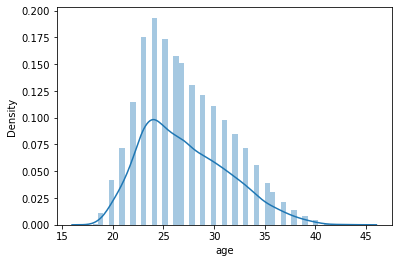

In [ ]:
#jogadores por idade
sns.distplot(nba_players.age)

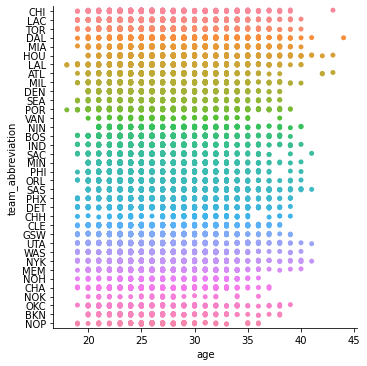

In [ ]:
#times por idade de jogadores
sns.catplot(x="age", y="team_abbreviation", data = nba_players)

In [ ]:
#total de jogadores por times
contagem_de_times = nba_players.team_abbreviation.value_counts().to_frame().reset_index()
contagem_de_times.columns = ["team", "total"]
contagem_de_times

,team,total
0,TOR,390
1,CLE,390
2,LAC,389
3,MIA,387
4,DAL,384
5,ATL,383
6,PHI,380
7,WAS,379
8,HOU,378
9,SAS,377


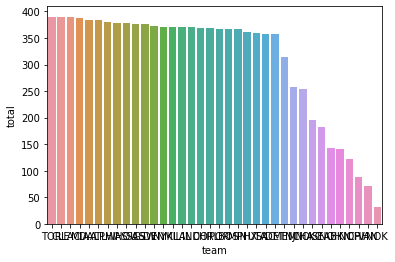

In [ ]:
#jogadores por  times
sns.barplot(x="team", y="total", data = contagem_de_times)

In [ ]:
total_de_times = nba_players.team_abbreviation.value_counts()
total_geral = total_de_times.sum()
total_tor = total_de_times.loc["TOR"]
total_do_resto = total_geral - total_tor
print(total_tor, total_do_resto)

390 10755


In [ ]:
#time com mais jogadores
dados = {
    'teams' : ['TOR','OUTROS'],
    'total' : [total_tor, total_do_resto]

}
dados = pd.DataFrame(dados)
dados

,teams,total
0,TOR,390
1,OUTROS,10755


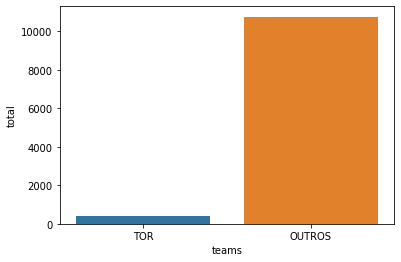

In [ ]:
#comparação do time com mais jogadores a todos
sns.barplot(x="teams", y="total", data = dados)

([<matplotlib.patches.Wedge at 0x7fd418bcc690>,
 [Text(1.0933596020078358, 0.12068463322754445, 'TOR'),
  Text(-1.0933596090699034, -0.12068456924772292, 'OUTROS')])

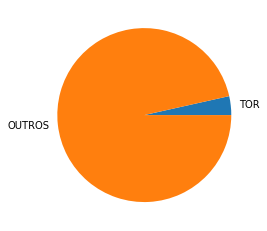

In [ ]:
#comparação do time com mais jogadores a todos
plt.pie(dados["total"], labels = dados["teams"])

In [ ]:
#times por jogadores tirando o time com mais jogadores
total_por_outros_times = nba_players.query("team_abbreviation != 'TOR'").team_abbreviation.value_counts()
total_por_outros_times

CLE    390
LAC    389
MIA    387
DAL    384
ATL    383
PHI    380
WAS    379
HOU    378
SAS    377
GSW    376
DEN    372
LAL    371
IND    371
NYK    371
MIL    371
CHI    369
ORL    368
POR    367
BOS    367
MIN    366
PHX    362
UTA    360
SAC    358
DET    358
MEM    315
NJN    257
CHA    254
OKC    195
SEA    182
NOH    143
BKN    140
NOP    122
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64

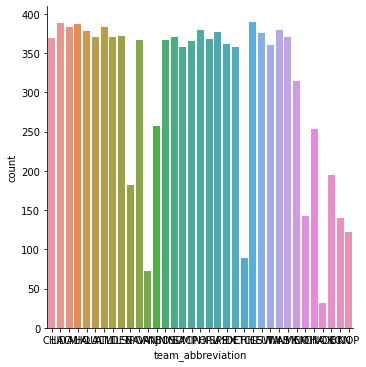

In [ ]:
total_por_outros_times = nba_players.query("team_abbreviation != 'TOR'")
sns.catplot(x="team_abbreviation", kind="count", data = total_por_outros_times)